In [1]:
######################## LOAD IN FILES #############################
import os
import pandas as pd
import sys
import importlib

# Get the absolute path of the project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Define data directory
brighten_dir = os.path.join(project_root, 'BRIGHTEN_data')

# Add project root to sys.path
sys.path.append(project_root)

# Import and reload custom scripts
from scripts import preprocessing as pre
from scripts import feature_selection as fs
from scripts import visualization as vis
from scripts import clustering as cl
from scripts import modeling as mod
importlib.reload(pre)
importlib.reload(fs)
importlib.reload(vis)
importlib.reload(cl)
importlib.reload(mod)


week_df_int70 = pd.read_csv(os.path.join(brighten_dir, 'week_df_int70.csv'))


################ DEFINE column variables from data ###################
from scripts.variables import id_columns, daily_cols_v1, daily_v2_common 
from scripts.variables import phq2_cols, phq9_cols, weekly_cols, passive_cols, survey_cols


def make_wide_column_names(columns):
       wide_column_names = []
       for var in columns:
              wide_column_names.append(f'{var}_avg_w1') # average of week 1
              wide_column_names.append(f'{var}_avg_wu2') # average of weeks 1-2
              wide_column_names.append(f'{var}_slope_wu2') # slope of values over time for weeks 1-2
              wide_column_names.append(f'{var}_avg_wu4') # average of weeks 1-4
              wide_column_names.append(f'{var}_slope_wu4')  # slope of values over time for weeks 1-4
              wide_column_names.append(f'{var}_avg_w4') # average of week 4
              wide_column_names.append(f'{var}_avg_w6') # average of week 4


/var/folders/fl/b24z_8kn4490x_bl0njv6fg00000gn/T/ipykernel_31471/2752955675.py:28: DtypeWarning: Columns (24,107,108,109) have mixed types. Specify dtype option on import or set low_memory=False.
  week_df_int70 = pd.read_csv(os.path.join(brighten_dir, 'week_df_int70.csv'))


In [ ]:
## Load in dfs
v1_day_pca = pd.read_csv(os.path.join(brighten_dir, 'v1_day_pca.csv'))
v1_week_phq9_pca = pd.read_csv(os.path.join(brighten_dir, 'v1_week_pca.csv'))
v1_week_phq2_pca = pd.read_csv(os.path.join(brighten_dir, 'v1_week_pca.csv'))

v2_day_pca = pd.read_csv(os.path.join(brighten_dir, 'v2_day_pca.csv'))
v2_week_phq9_pca = pd.read_csv(os.path.join(brighten_dir, 'v2_week_pca.csv'))
v2_week_phq2_pca = pd.read_csv(os.path.join(brighten_dir, 'v2_week_pca.csv'))

In [ ]:
df_names = ['v1_day', 'v2_day', 'v1_week', 'v2_week']


wide_df_pca = {}
for name in df_names:
    wide_df_pca[name] = pd.read_csv(os.path.join(brighten_dir, f'wide_{name}_pca.csv'))

wide_df_bin = {}
for name in df_names:
    wide_df_bin[name] = pd.read_csv(os.path.join(brighten_dir, f'wide_{name}_bin.csv'))


wide_df_clusters = {}
for name in df_names:
    wide_df_clusters[name] = pd.read_csv(os.path.join(brighten_dir, f'wide_{name}_clusters.csv'))



X cols: ['pc_mobility_avg_w1', 'pc_missed_communications_avg_w1', 'pc_communications_avg_w1']


(158, 4)
df shape (158, 4), X (158, 3), y (158, 1), ['pc_depression_avg_w1']
Check for set overlap: set() set() set()
Training set size: (107, 3)
Test set size: (27, 3)
Validation set size: (24, 3)
Range pc_depression_avg_w1   -0.503694
dtype: float64 to pc_depression_avg_w1    1.163273
dtype: float64
Cross-validation MSE scores: [0.17710483 0.24502121 0.20165991 0.15702786 0.20100515]
Average Cross-validation MSE scores: 0.19636379441036844
Regression mean_absolute_error: 0.44, r2: -0.02
Regression Held-out mean_absolute_error: 0.44, r2: -0.02


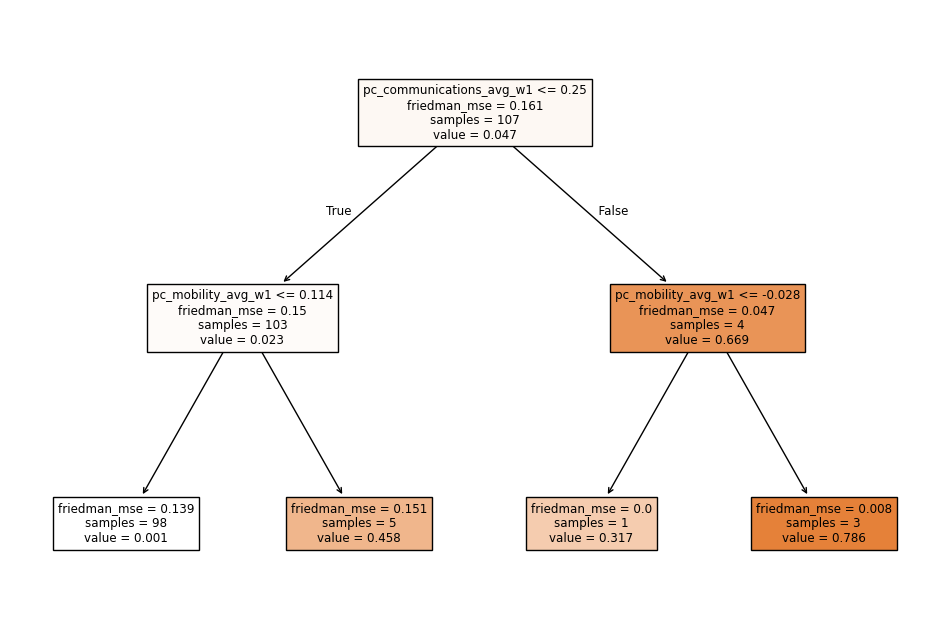

In [ ]:
X_cols = [var for var in wide_df_pca['v1_day'].columns.to_list() if 'w1' in var and 'pc_' in var and 'depression' not in var]
mae, r2 = mod.dt_regressor(wide_df_pca['v1_day'], X_cols, ['pc_depression_phq2_avg_w1'])

In [ ]:
######### Mixed LM Model V1 vs phq2_sum #########
###### V1 PCs vs phq2_sum #########
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.api as sm
import statsmodels.formula.api as smf

x_cols = ['pc_communications_avg_w1', 'pc_missed_communications_avg_w1', 'pc_mobility_avg_w1']
y_col = ['pc_depression_avg_w1']
df= wide_df_clusters['v1_day'].dropna(subset=x_cols + y_col + ['num_id'])
df = df.copy()
model = smf.mixedlm(f"pc_depression_avg_w1 ~ pc_communications_avg_w1 + pc_missed_communications_avg_w1 + pc_mobility_avg_w1", 
                    data=df, 
                    groups=wide_df_clusters['v1_day']["Cluster"])
result = model.fit()
print(f'X cols {x_cols} relationship to y_col {y_col},  Nested Linear Regression')
print(result.summary())

X cols ['pc_communications_avg_w1', 'pc_missed_communications_avg_w1', 'pc_mobility_avg_w1'] relationship to y_col ['pc_depression_avg_w1'],  Nested Linear Regression
                  Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   pc_depression_avg_w1
No. Observations:     83        Method:               REML                
No. Groups:           6         Scale:                0.1668              
Min. group size:      2         Log-Likelihood:       -40.9485            
Max. group size:      23        Converged:            Yes                 
Mean group size:      13.8                                                
--------------------------------------------------------------------------
                                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------
Intercept                        0.018    0.045  0.392 0.695 -0.071  0.106
pc_communications_avg_w1   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


X cols: ['pc_mobility_avg_wu2', 'pc_missed_communications_avg_wu2', 'pc_communications_avg_wu2']
(169, 4)
df shape (169, 4), X (169, 3), y (169, 1), ['pc_depression_avg_wu2']
Check for set overlap: set() set() set()
Training set size: (114, 3)
Test set size: (29, 3)
Validation set size: (26, 3)
Range pc_depression_avg_wu2   -0.503694
dtype: float64 to pc_depression_avg_wu2    0.722354
dtype: float64
Cross-validation MSE scores: [0.15373368 0.22605211 0.137729   0.20359613 0.11769092]
Average Cross-validation MSE scores: 0.16776036786704884
Regression mean_absolute_error: 0.35, r2: -1.04
Regression Held-out mean_absolute_error: 0.35, r2: -1.04


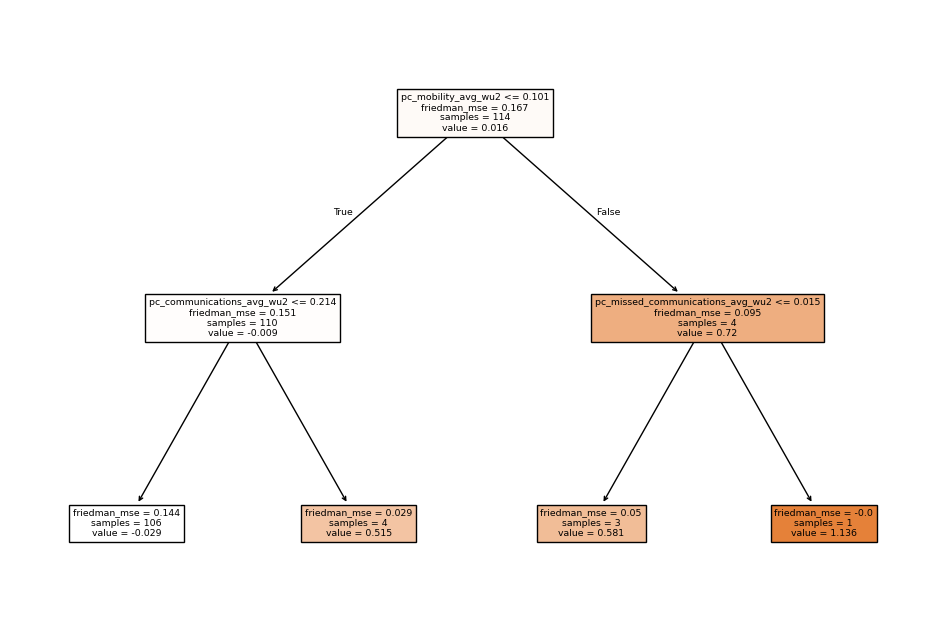

In [ ]:
X_cols = [var for var in wide_df_pca['v1_day'].columns.to_list() if 'wu2' in var and 'pc_' in var and 'depression' not in var]
mae, r2 = mod.dt_regressor(wide_df_pca['v1_day'], X_cols, ['pc_depression_phq2_avg_wu2'])

X cols: ['pc_mobility_avg_wu4', 'pc_missed_communications_avg_wu4', 'pc_communications_avg_wu4']
(180, 4)
df shape (180, 4), X (180, 3), y (180, 1), ['pc_depression_avg_wu4']
Check for set overlap: set() set() set()
Training set size: (122, 3)
Test set size: (31, 3)
Validation set size: (27, 3)
Range pc_depression_avg_wu4   -0.38606
dtype: float64 to pc_depression_avg_wu4    0.655418
dtype: float64
Cross-validation MSE scores: [0.09679485 0.16307368 0.18549414 0.12895696 0.16422219]
Average Cross-validation MSE scores: 0.147708365797714
Regression mean_absolute_error: 0.26, r2: -0.22
Regression Held-out mean_absolute_error: 0.26, r2: -0.22


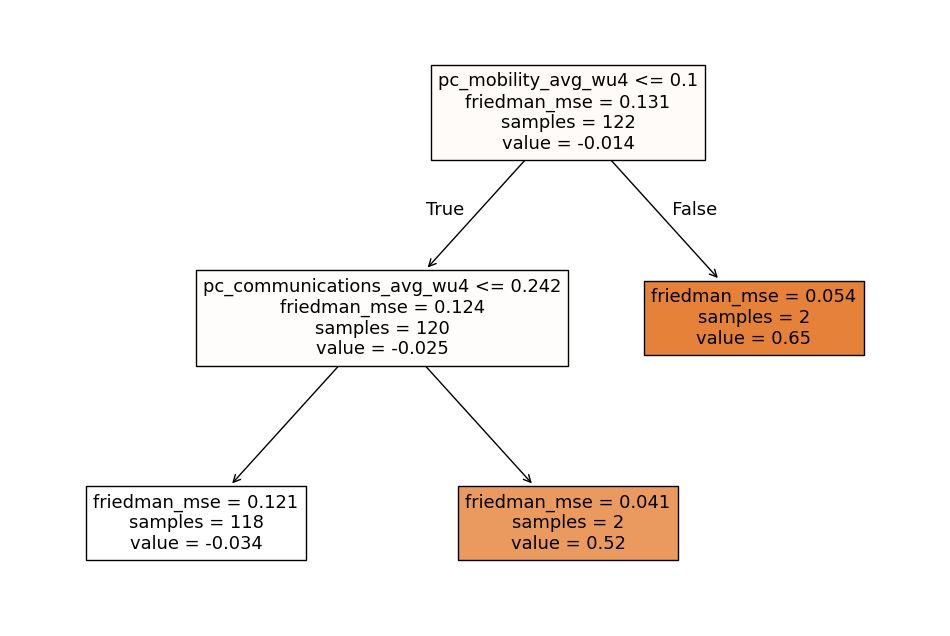

In [ ]:
X_cols = [var for var in wide_df_pca['v1_day'].columns.to_list() if 'wu4' in var and 'pc_' in var and 'depression' not in var]
mae, r2 = mod.dt_regressor(wide_df_pca['v1_day'], X_cols, ['pc_depression_phq2_avg_wu4'])

X cols: ['pc_mobility_avg_w1', 'pc_missed_communications_avg_w1', 'pc_communications_avg_w1']
(21, 4)
df shape (21, 4), X (21, 3), y (21, 1), ['pc_depression_avg_w1']
Check for set overlap: set() set() set()
Training set size: (13, 3)
Test set size: (4, 3)
Validation set size: (4, 3)
Range pc_depression_avg_w1   -0.420412
dtype: float64 to pc_depression_avg_w1    0.392134
dtype: float64
Cross-validation MSE scores: [0.43264792 0.08237516 0.16870484 0.44258849 0.35758442]
Average Cross-validation MSE scores: 0.2967801660628405
Regression mean_absolute_error: 0.26, r2: 0.01
Regression Held-out mean_absolute_error: 0.26, r2: 0.01


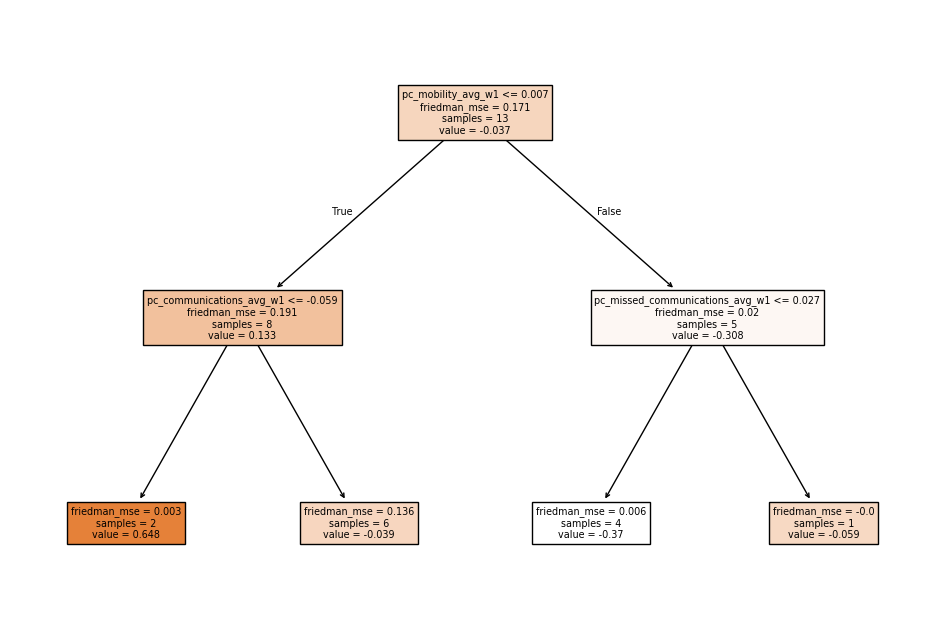

In [ ]:
X_cols = [var for var in wide_df_clusters['v1_day'].columns.to_list() if 'w1' in var and 'pc_' in var and 'depression' not in var]
cluster1 = wide_df_clusters['v1_day'][wide_df_clusters['v1_day']['demo_cluster']==1]
mae, r2 = mod.dt_regressor(cluster1, X_cols, ['pc_depression_phq2_avg_w1'])


X cols: ['pc_mobility_avg_wu2', 'pc_missed_communications_avg_wu2', 'pc_communications_avg_wu2']
(21, 4)
df shape (21, 4), X (21, 3), y (21, 1), ['pc_depression_avg_wu2']
Check for set overlap: set() set() set()
Training set size: (13, 3)
Test set size: (4, 3)
Validation set size: (4, 3)
Range pc_depression_avg_wu2   -0.436222
dtype: float64 to pc_depression_avg_wu2    0.333369
dtype: float64
Cross-validation MSE scores: [0.34792997 0.06543191 0.19705956 0.41908218 0.42009954]
Average Cross-validation MSE scores: 0.2899206322704083
Regression mean_absolute_error: 0.36, r2: -0.91
Regression Held-out mean_absolute_error: 0.36, r2: -0.91


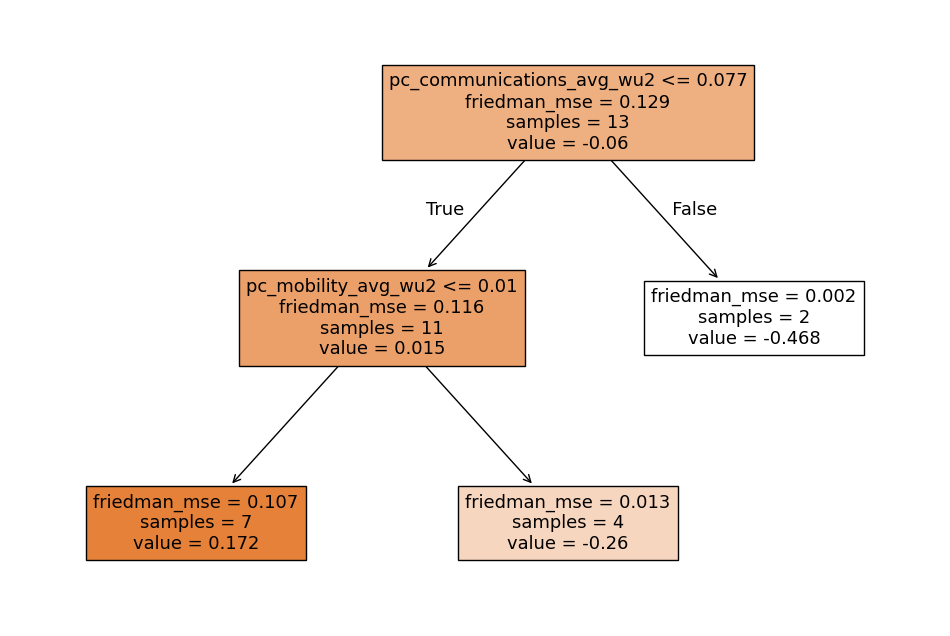

In [ ]:
X_cols = [var for var in wide_df_clusters['v1_day'].columns.to_list() if 'wu2' in var and 'pc_' in var and 'depression' not in var]
cluster1 = wide_df_clusters['v1_day'][wide_df_clusters['v1_day']['demo_cluster']==1]
mae, r2 = mod.dt_regressor(cluster1, X_cols, ['pc_depression_phq2_avg_wu2'])

X cols: ['pc_mobility_avg_wu4', 'pc_missed_communications_avg_wu4', 'pc_communications_avg_wu4']
(21, 4)
df shape (21, 4), X (21, 3), y (21, 1), ['pc_depression_avg_wu4']
Check for set overlap: set() set() set()
Training set size: (13, 3)
Test set size: (4, 3)
Validation set size: (4, 3)
Range pc_depression_avg_wu4   -0.242847
dtype: float64 to pc_depression_avg_wu4    0.238855
dtype: float64
Cross-validation MSE scores: [0.1253514  0.05434233 0.10712529 0.39462928 0.11391223]
Average Cross-validation MSE scores: 0.15907210642313027
Regression mean_absolute_error: 0.21, r2: -0.45
Regression Held-out mean_absolute_error: 0.21, r2: -0.45


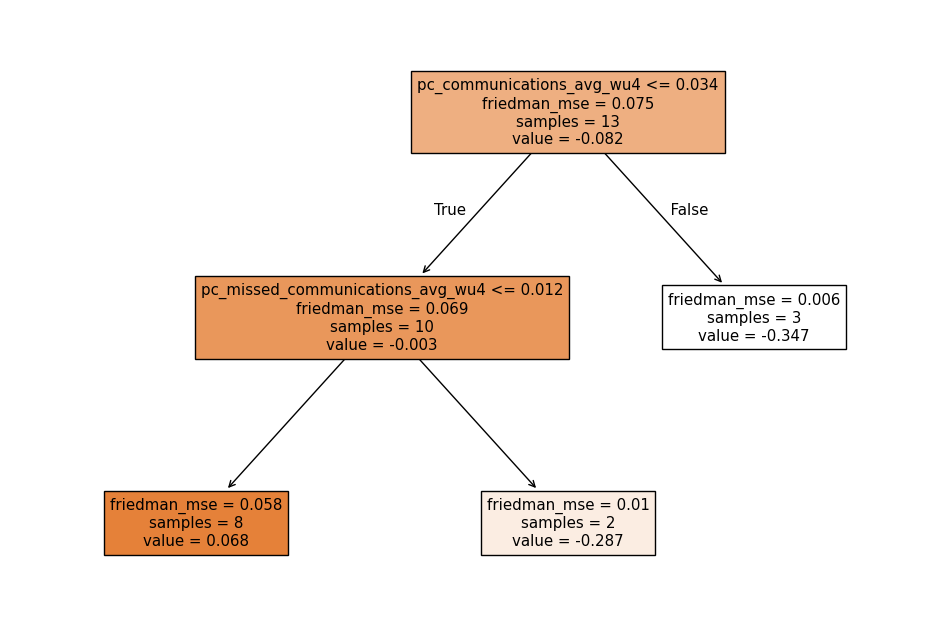

In [ ]:
X_cols = [var for var in wide_df_clusters['v1_day'].columns.to_list() if 'wu4' in var and 'pc_' in var and 'depression' not in var]
cluster1 = wide_df_clusters['v1_day'][wide_df_clusters['v1_day']['demo_cluster']==1]
mae, r2 = mod.dt_regressor(cluster1, X_cols, ['pc_depression_phq2_avg_wu4'])

X cols: ['pc_mobility_avg_wu4', 'pc_missed_communications_avg_wu4', 'pc_communications_avg_wu4']
(21, 4)
df shape (21, 4), X (21, 3), y (21, 1), ['pc_depression_avg_wu4']
Check for set overlap: set() set() set()
Training set size: (13, 3)
Test set size: (4, 3)
Validation set size: (4, 3)
Range pc_depression_avg_wu4   -0.392488
dtype: float64 to pc_depression_avg_wu4    0.005434
dtype: float64
Cross-validation MSE scores: [0.06508734 0.07093033 0.1145079  0.09569578 0.04255186]
Average Cross-validation MSE scores: 0.07775464056572332
Regression mean_absolute_error: 0.39, r2: -6.44
Regression Held-out mean_absolute_error: 0.39, r2: -6.44


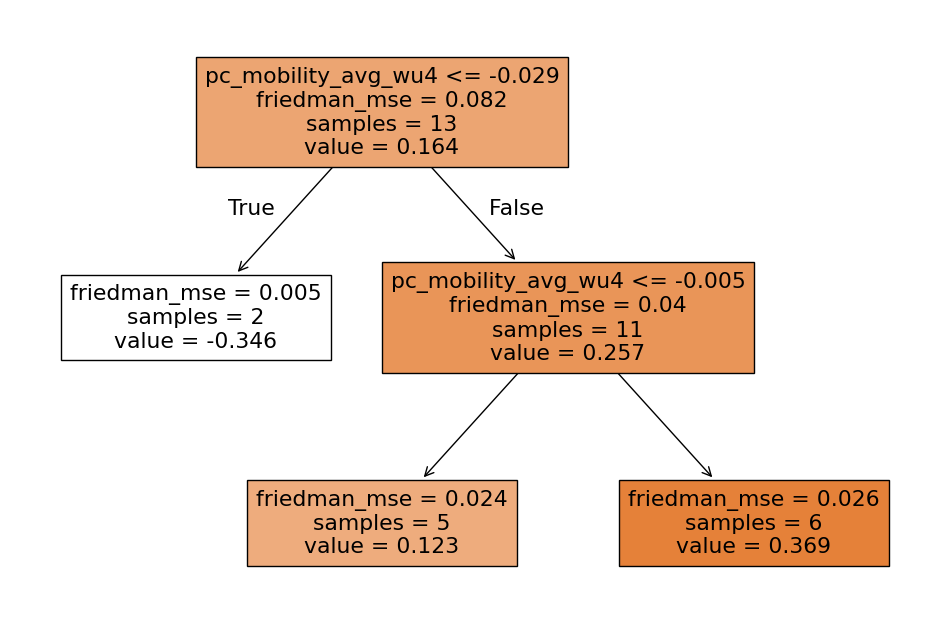

In [ ]:
X_cols = [var for var in wide_df_clusters['v1_day'].columns.to_list() if 'wu4' in var and 'pc_' in var and 'depression' not in var]
cluster2 = wide_df_clusters['v1_day'][wide_df_clusters['v1_day']['demo_cluster']==2]
mae, r2 = mod.dt_regressor(cluster2, X_cols, ['pc_depression_phq2_avg_wu4'])

X cols: ['pc_mobility_avg_wu4', 'pc_missed_communications_avg_wu4', 'pc_communications_avg_wu4']
(25, 4)
df shape (25, 4), X (25, 3), y (25, 1), ['pc_depression_avg_wu4']
Check for set overlap: set() set() set()
Training set size: (16, 3)
Test set size: (5, 3)
Validation set size: (4, 3)
Range pc_depression_avg_wu4   -0.186004
dtype: float64 to pc_depression_avg_wu4    0.650173
dtype: float64
Cross-validation MSE scores: [0.2757401  0.12924328 0.12068501 0.41226849 0.10152343]
Average Cross-validation MSE scores: 0.2078920612154484
Regression mean_absolute_error: 0.44, r2: -2.25
Regression Held-out mean_absolute_error: 0.44, r2: -2.25


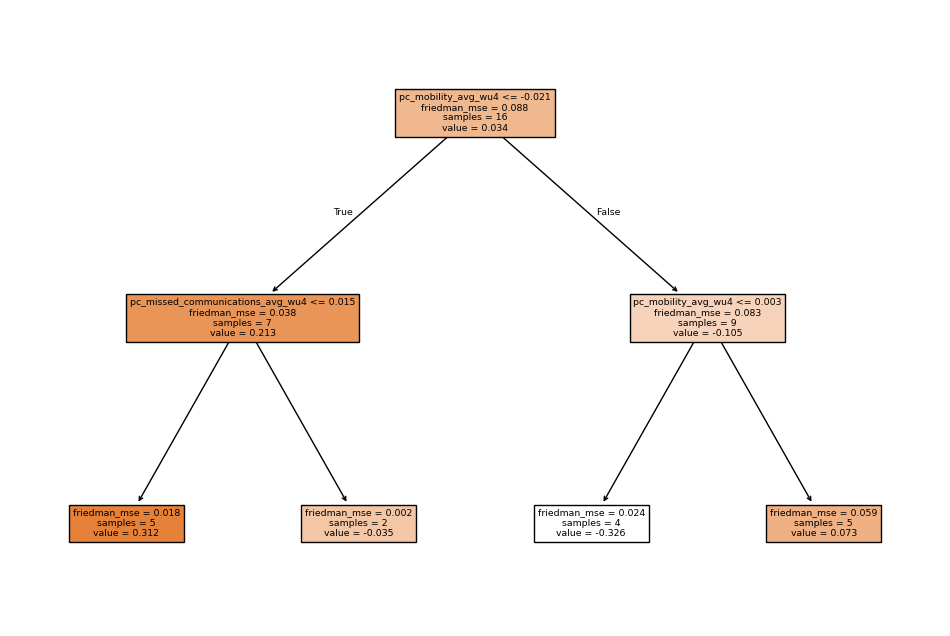

In [ ]:
X_cols = [var for var in wide_df_clusters['v1_day'].columns.to_list() if 'wu4' in var and 'pc_' in var and 'depression' not in var]
cluster = wide_df_clusters['v1_day'][wide_df_clusters['v1_day']['phq9_base_cluster']==1]
mae, r2 = mod.dt_regressor(cluster, X_cols, ['pc_depression_phq2_avg_wu4'])

X cols: ['pc_mobility_avg_wu4', 'pc_missed_communications_avg_wu4', 'pc_communications_avg_wu4']
(12, 4)
df shape (12, 4), X (12, 3), y (12, 1), ['pc_depression_avg_wu4']
Check for set overlap: set() set() set()
Training set size: (8, 3)
Test set size: (2, 3)
Validation set size: (2, 3)
Range pc_depression_avg_wu4   -0.304042
dtype: float64 to pc_depression_avg_wu4    0.274002
dtype: float64
Cross-validation MSE scores: [0.07472533 0.15998384 0.21710032 0.04326532 0.21422244]
Average Cross-validation MSE scores: 0.14185944743793225
Regression mean_absolute_error: 0.29, r2: -0.02
Regression Held-out mean_absolute_error: 0.29, r2: -0.02


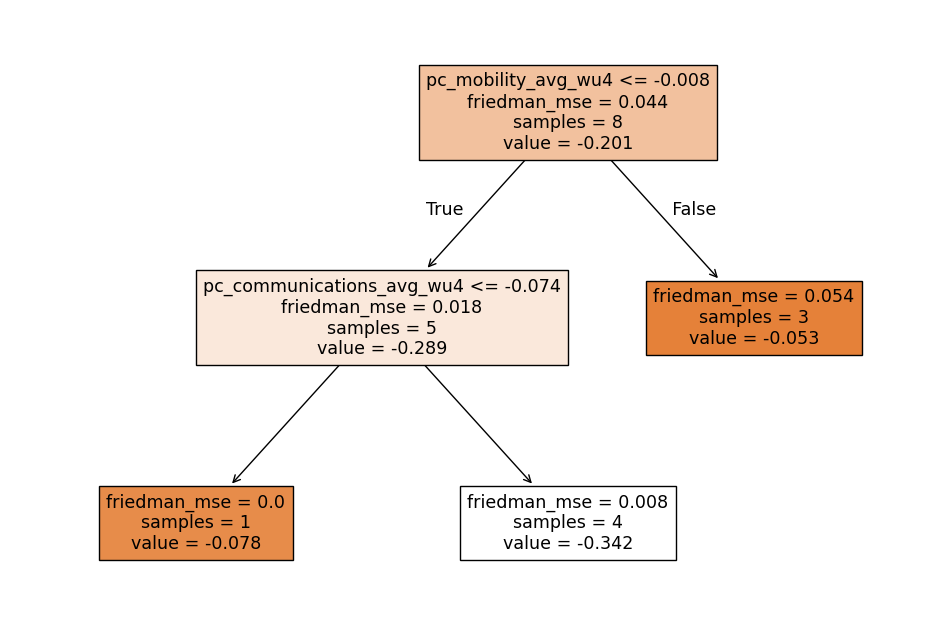

In [ ]:
X_cols = [var for var in wide_df_clusters['v1_day'].columns.to_list() if 'wu4' in var and 'pc_' in var and 'depression' not in var]
cluster = wide_df_clusters['v1_day'][wide_df_clusters['v1_day']['phq9_base_cluster']==2]
mae, r2 = mod.dt_regressor(cluster, X_cols, ['pc_depression_phq2_avg_wu4'])

X cols: ['pc_mobility_avg_wu4', 'pc_missed_communications_avg_wu4', 'pc_communications_avg_wu4']
(18, 4)
df shape (18, 4), X (18, 3), y (18, 1), ['pc_depression_avg_wu4']
Check for set overlap: set() set() set()
Training set size: (12, 3)
Test set size: (3, 3)
Validation set size: (3, 3)
Range pc_depression_avg_wu4   -0.392488
dtype: float64 to pc_depression_avg_wu4    0.238855
dtype: float64
Cross-validation MSE scores: [0.0943432  0.13702327 0.12826319 0.09855559 0.13061515]
Average Cross-validation MSE scores: 0.11776007793320593
Regression mean_absolute_error: 0.35, r2: -0.81
Regression Held-out mean_absolute_error: 0.35, r2: -0.81


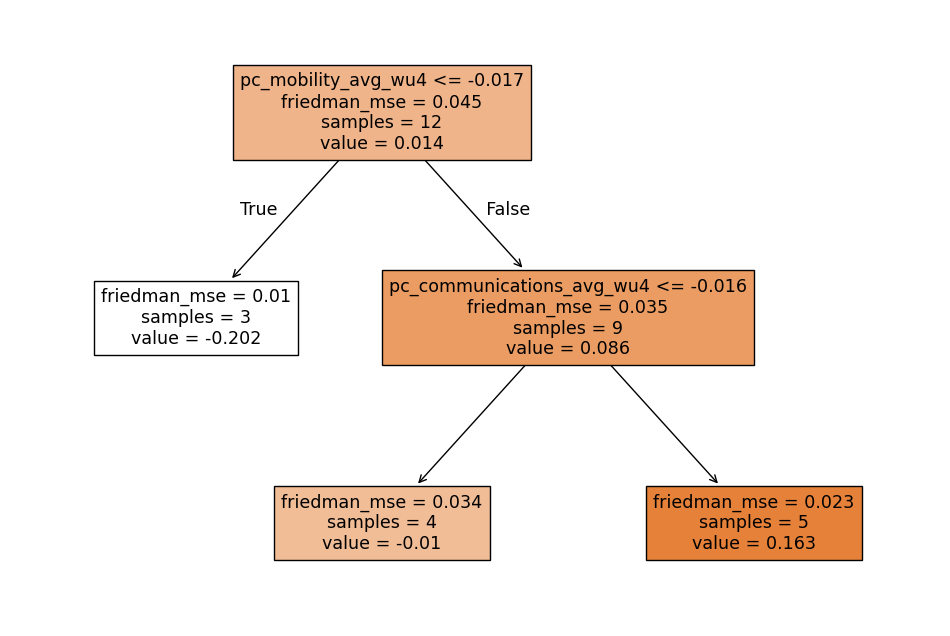

In [ ]:
X_cols = [var for var in wide_df_clusters['v1_day'].columns.to_list() if 'wu4' in var and 'pc_' in var and 'depression' not in var]
cluster = wide_df_clusters['v1_day'][wide_df_clusters['v1_day']['phq9_base_cluster']==3]
mae, r2 = mod.dt_regressor(cluster, X_cols, ['pc_depression_phq2_avg_wu4'])

X cols: ['pc_mobility_avg_wu4', 'pc_missed_communications_avg_wu4', 'pc_communications_avg_wu4']
(28, 4)
df shape (28, 4), X (28, 3), y (28, 1), ['pc_depression_avg_wu4']
Check for set overlap: set() set() set()
Training set size: (18, 3)
Test set size: (5, 3)
Validation set size: (5, 3)
Range pc_depression_avg_wu4   -0.432217
dtype: float64 to pc_depression_avg_wu4    0.607017
dtype: float64
Cross-validation MSE scores: [0.14613712 0.24380921 0.23151227 0.12538424 0.23497358]
Average Cross-validation MSE scores: 0.19636328335213837
Regression mean_absolute_error: 0.27, r2: 0.26
Regression Held-out mean_absolute_error: 0.27, r2: 0.26


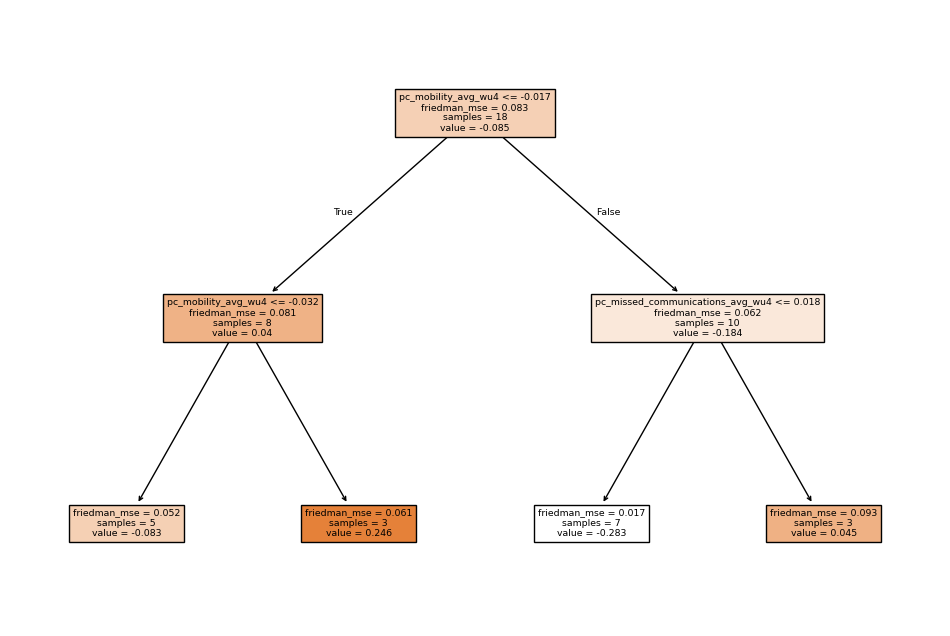

In [ ]:
X_cols = [var for var in wide_df_clusters['v1_day'].columns.to_list() if 'wu4' in var and 'pc_' in var and 'depression' not in var]
cluster = wide_df_clusters['v1_day'][wide_df_clusters['v1_day']['phq9_base_cluster']==0]
mae, r2 = mod.dt_regressor(cluster, X_cols, ['pc_depression_phq2_avg_wu4'])

X cols: ['pc_sleep_hours_avg_wu2', 'pc_activity_avg_wu2', 'pc_stationary_hours_avg_wu2', 'pc_vehicle_avg_wu2']
(53, 5)
df shape (53, 5), X (53, 4), y (53, 1), ['pc_depression_avg_wu4']
Check for set overlap: set() set() set()
Training set size: (36, 4)
Test set size: (9, 4)
Validation set size: (8, 4)
Range pc_depression_avg_wu4   -0.428374
dtype: float64 to pc_depression_avg_wu4    0.547431
dtype: float64
Cross-validation MSE scores: [0.1548835  0.07038482 0.06356231 0.09687311 0.10841825]
Average Cross-validation MSE scores: 0.09882439738963285
Regression mean_absolute_error: 0.35, r2: -0.41
Regression Held-out mean_absolute_error: 0.35, r2: -0.41


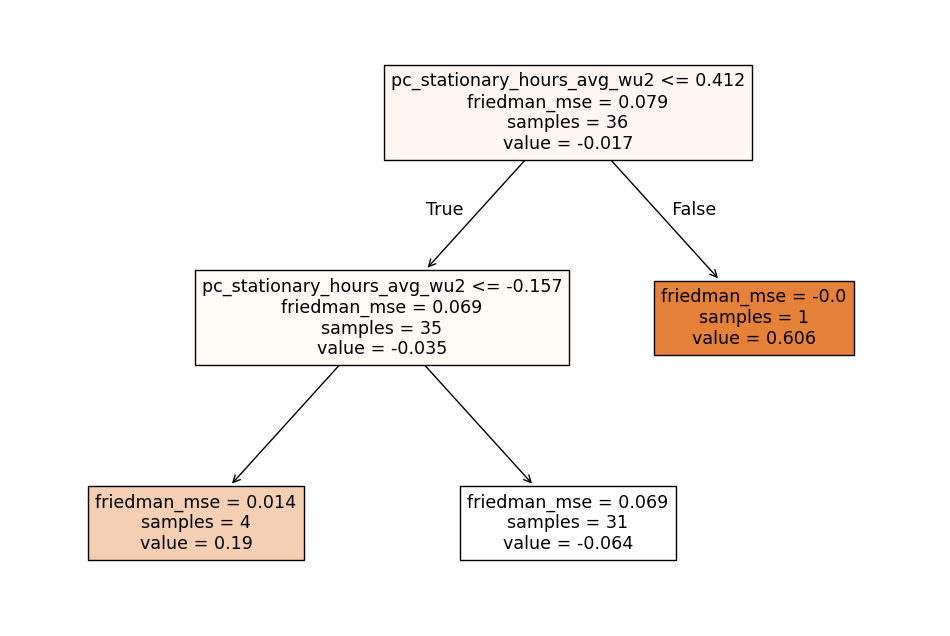

In [ ]:
X_cols = [var for var in wide_df_pca['v2_day'].columns.to_list() if 'wu2' in var and 'pc_' in var and 'depression' not in var]
mae, r2 = mod.dt_regressor(wide_df_pca['v2_day'], X_cols, ['pc_depression_phq2_avg_wu4'])

X cols: ['pc_sleep_hours_avg_wu4', 'pc_activity_avg_wu4', 'pc_stationary_hours_avg_wu4', 'pc_vehicle_avg_wu4']
(60, 5)
df shape (60, 5), X (60, 4), y (60, 1), ['pc_depression_avg_wu4']
Check for set overlap: set() set() set()
Training set size: (40, 4)
Test set size: (11, 4)
Validation set size: (9, 4)
Range pc_depression_avg_wu4   -0.309802
dtype: float64 to pc_depression_avg_wu4    0.381008
dtype: float64
Cross-validation MSE scores: [0.16440859 0.13877604 0.22110088 0.20526635 0.28878155]
Average Cross-validation MSE scores: 0.20366668226064374
Regression mean_absolute_error: 0.24, r2: -0.32
Regression Held-out mean_absolute_error: 0.24, r2: -0.32


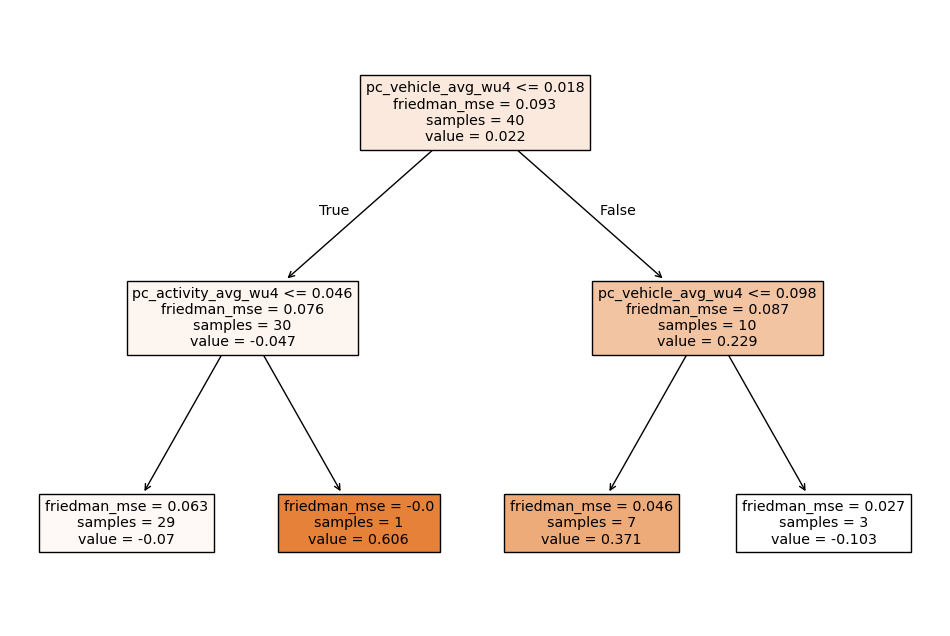

In [ ]:
X_cols = [var for var in wide_df_pca['v2_day'].columns.to_list() if 'wu4' in var and 'pc_' in var and 'depression' not in var]
mae, r2 = mod.dt_regressor(wide_df_pca['v2_day'], X_cols, ['pc_depression_phq2_avg_wu4'])